## sea_level_predictor

In [19]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
import statsmodels
sns.set()



In [6]:
data = pd.read_csv('epa-sea-level.csv')
df = data.copy()
df.head()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN


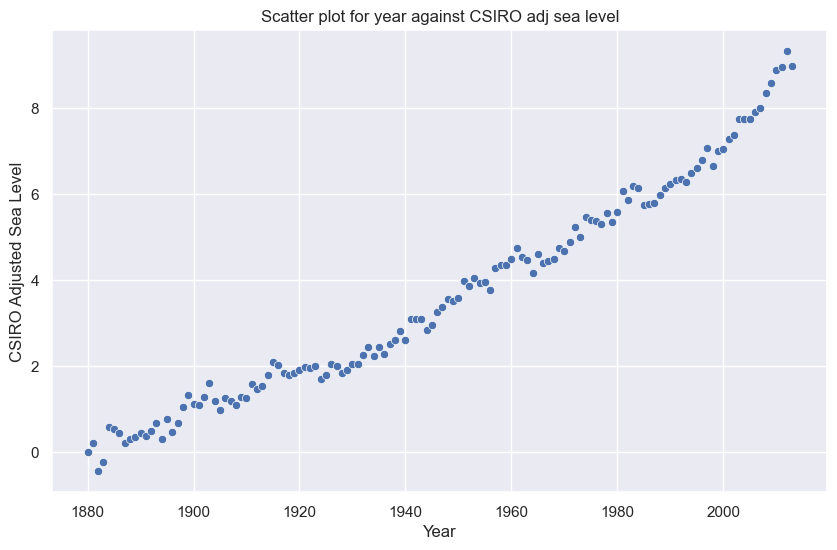

In [9]:
figure(figsize=(10,6))
plt.title('Scatter plot for year against CSIRO adj sea level')
sns.scatterplot(x='Year',y='CSIRO Adjusted Sea Level',data=df)
plt.show()

In [11]:
from scipy.stats import linregress
linregress(x=df['Year'],y=df['CSIRO Adjusted Sea Level'])

LinregressResult(slope=0.0630445840121348, intercept=-119.06594196773978, rvalue=0.984757131182585, pvalue=3.7886969791131554e-102, stderr=0.000969211871328715, intercept_stderr=1.8869433812425225)

In [14]:
slope,intercept ,rvalue,pvalue,stderr = linregress(x=df['Year'],y=df['CSIRO Adjusted Sea Level'])

In [18]:
y = slope*df['CSIRO Adjusted Sea Level'] + intercept


0     -119.065942
1     -119.052042
2     -119.093741
3     -119.080586
4     -119.028711
          ...    
129   -118.524602
130   -118.504746
131   -118.500775
132   -118.477940
133   -118.499782
Name: CSIRO Adjusted Sea Level, Length: 134, dtype: float64


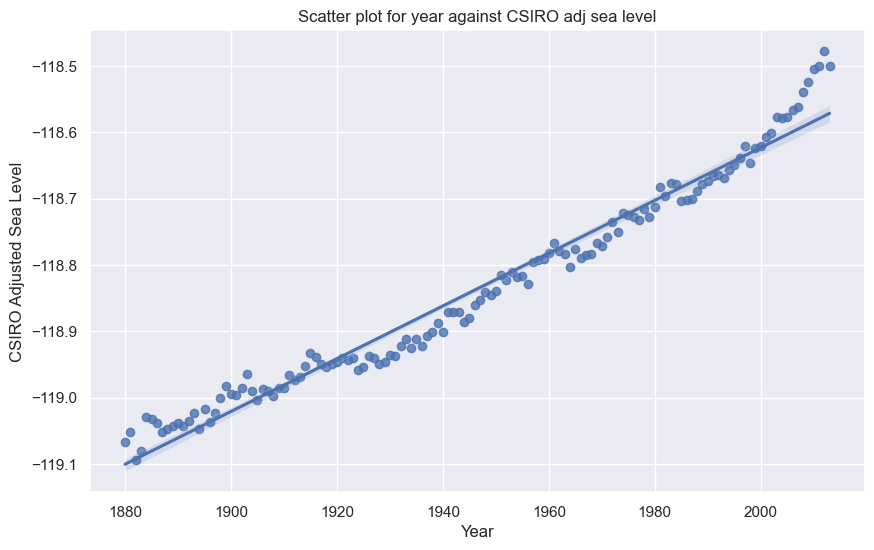

In [46]:
figure(figsize=(10,6))
plt.title('Scatter plot for year against CSIRO adj sea level')
sns.regplot(x='Year',y=y,data=df)
plt.show()

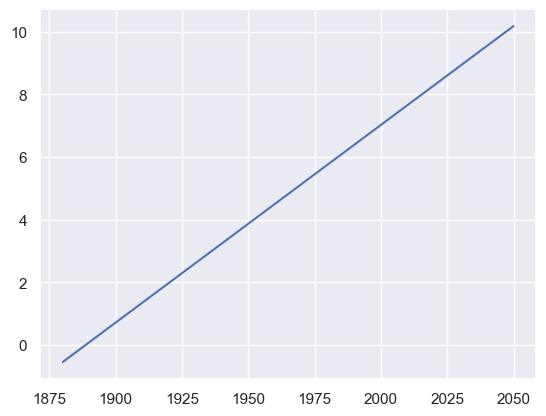

In [47]:
future_years = [year for year in range(1880, 2051)]
predicted_sea_levels = [slope * year + intercept for year in future_years]
plt.plot(future_years, predicted_sea_levels, label='Entire Dataset')


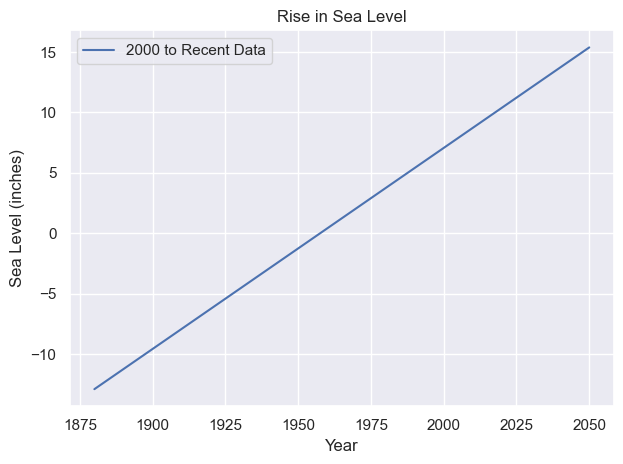

In [49]:
recent_data = df[df['Year'] >= 2000]
slope_recent, intercept_recent, _, _, _ = linregress(recent_data['Year'], recent_data['CSIRO Adjusted Sea Level'])

# Predict sea level rise in 2050 using recent data
predicted_sea_levels_recent = [slope_recent * year + intercept_recent for year in future_years]
plt.plot(future_years, predicted_sea_levels_recent, label='2000 to Recent Data')

# Set labels and titles
plt.xlabel('Year')
plt.ylabel('Sea Level (inches)')
plt.title('Rise in Sea Level')
plt.legend()

# Display the plot
plt.tight_layout()
# plt.savefig('sea_level_rise.png')
plt.show()
